In [58]:
import pandas as pd
import networkx as nx
import plotly.graph_objects as go
from IPython.display import Image


In [8]:
data = pd.read_csv('../data/dylan_map.csv', index_col=[0])

In [56]:
# Filter out nodes with adjacency smaller than 4
G = nx.Graph()
G.add_edges_from([mi, wi] for mi, wi in data[['miner_id', 'id']].drop_duplicates().values)
to_be_removed = [x for  x in G.nodes() if G.degree(x) <= 4]
for x in to_be_removed:
    G.remove_node(x)

rank = 1
cc = sorted(nx.connected_components(G), key=len)[::-1][rank - 1]
G = G.subgraph(cc)


# 1. Define a layout

pos = nx.fruchterman_reingold_layout(G)

# 2. Populate the 'pos' element, this is metadata for the graphing
for node, (n,p) in zip(G.nodes(), pos.items()):
    G.nodes[node]['pos'] = p
    
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = G.nodes[edge[0]]['pos']
    x1, y1 = G.nodes[edge[1]]['pos']
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#333'),
    hoverinfo='none',
    mode='lines')

node_x = []
node_y = []
for node in G.nodes():
    x, y = G.nodes[node]['pos']
    node_x.append(x)
    node_y.append(y)

node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        color=[],
        size=10,
        line_width=0))

node_adjacencies = []
node_text = []
count = 0
for node, adjacencies in enumerate(G.adjacency()):
    from_name = data['miner_id'].iloc[count]
    to_name = data['id'].iloc[count]
    node_adjacencies.append(len(adjacencies[1]))
    node_text.append('From ' + from_name + ' To ' + to_name + ' \nConnections '+str(len(adjacencies[1])))
    count += 1

node_trace.marker.color = node_adjacencies
node_trace.text = node_text

fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                title='Subnetwork rank %s' % rank,
                titlefont_size=16,
                 height=800,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )
fig.show()

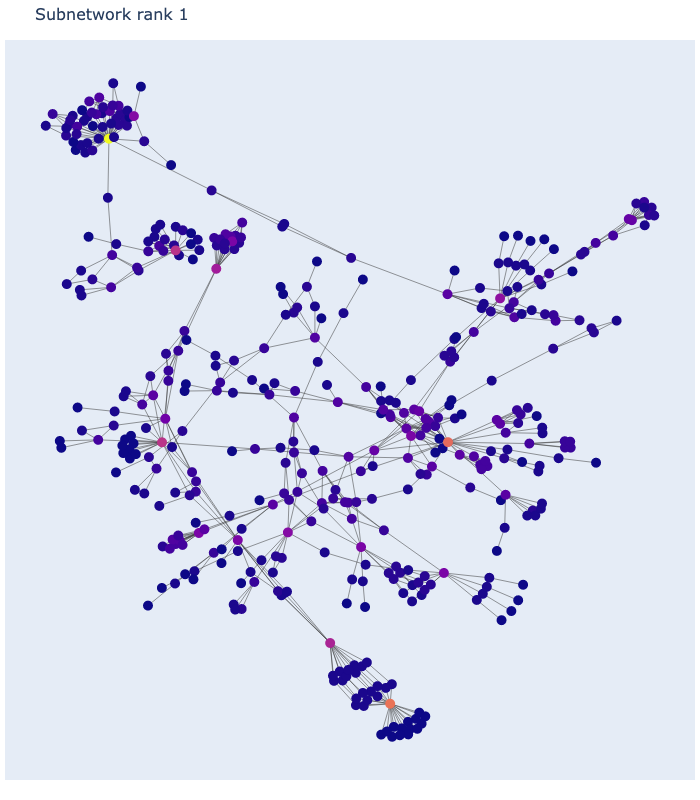

In [59]:
img_bytes = fig.to_image(format="png")
Image(img_bytes)
